In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('fake_job_postings.csv')
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.tail(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


## Data Exploration

In [4]:
df.shape

(17880, 18)

In [5]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
print("Unique Values :",df['fraudulent'].unique())
print(df['fraudulent'].value_counts())

Unique Values : [0 1]
0    17014
1      866
Name: fraudulent, dtype: int64


In [7]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                5
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [8]:
df2 = df.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'employment_type'], axis=1)

In [9]:
df2.fillna('',inplace=True)

## Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

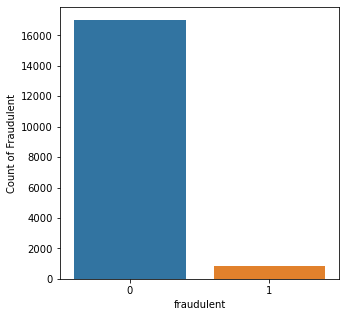

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='fraudulent', data=df)
plt.ylabel("Count of Fraudulent")
plt.show

In [11]:
experience = dict(df2.required_experience.value_counts())
del experience['']

In [12]:
experience

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

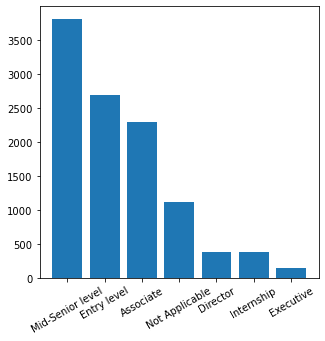

In [13]:
plt.figure(figsize=(5,5))
plt.bar(experience.keys(), experience.values())
plt.xticks(rotation=30)
plt.show()

In [14]:
def split(location):
    loc = location.split(',')
    return loc[0]

In [15]:
df2['Country'] = df2.location.apply(split)

In [16]:
df2.head(3)

,title,location,department,company_profile,description,requirements,benefits,has_questions,required_experience,required_education,industry,function,fraudulent,Country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,,,,,0,US


In [17]:
df2.Country.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SV        1
AL        1
PE        1
HR        1
SD        1
Name: Country, Length: 91, dtype: int64

In [18]:
country = dict(df2.Country.value_counts()[:14])
del country['']
country

{'US': 10656,
 'GB': 2384,
 'GR': 940,
 'CA': 457,
 'DE': 383,
 'NZ': 333,
 'IN': 276,
 'AU': 214,
 'PH': 132,
 'NL': 127,
 'BE': 117,
 'IE': 114,
 'SG': 80}

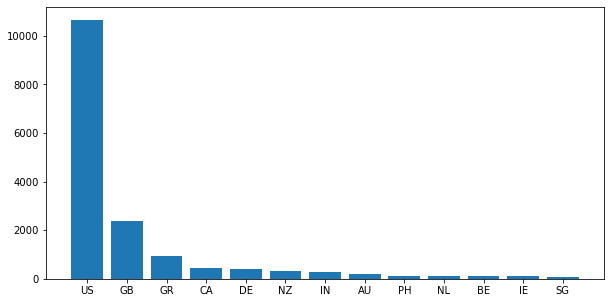

In [19]:
plt.figure(figsize=(10,5))
plt.bar(country.keys(), country.values())
plt.show()

In [20]:
edu = dict(df2.required_education.value_counts()[:7])
del edu['']
edu

{"Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

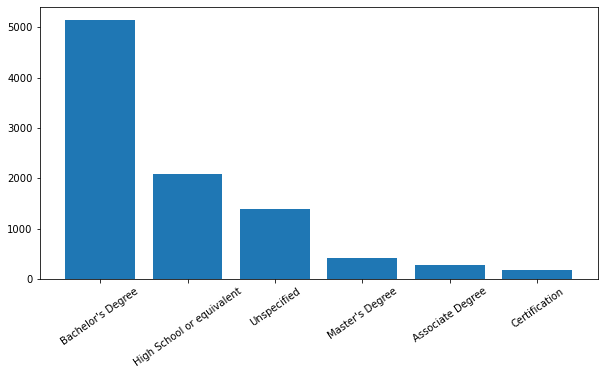

In [21]:
plt.figure(figsize=(10,5))
plt.bar(edu.keys(), edu.values())
plt.xticks(rotation=35)
plt.show()

In [22]:
# job titles that were not fradulent
print(df2[df2.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [23]:
#job titles that found to be fradulent
print(df2[df2.fraudulent==1].title.value_counts()[:10])

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Network Marketing                                                       10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [24]:
df2.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'has_questions', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'Country'],
      dtype='object')

In [25]:
df2["text"] = df2["title"]+" "+df2["company_profile"]+" "+ df2["description"]+" "+df2["requirements"]+" "+df2["benefits"]
df2["text"]

0        Marketing Intern We're Food52, and we've creat...
1        Customer Service - Cloud Video Production 90 S...
2        Commissioning Machinery Assistant (CMA) Valor ...
3        Account Executive - Washington DC Our passion ...
4        Bill Review Manager SpotSource Solutions LLC i...
                               ...                        
17875    Account Director - Distribution  Vend is looki...
17876    Payroll Accountant WebLinc is the e-commerce p...
17877    Project Cost Control Staff Engineer - Cost Con...
17878    Graphic Designer  Nemsia Studios is looking fo...
17879    Web Application Developers Vend is looking for...
Name: text, Length: 17880, dtype: object

In [26]:
df3 = pd.DataFrame(df2['text'])
df3['fraudulent'] = df2['fraudulent']
df3.head()

,text,fraudulent
0,"Marketing Intern We're Food52, and we've creat...",0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valor ...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [27]:
fraudjobs_text = df3[df3['fraudulent']==1].text
realjobs_text = df3[df3['fraudulent']==0].text

In [28]:
from wordcloud import WordCloud, STOPWORDS
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

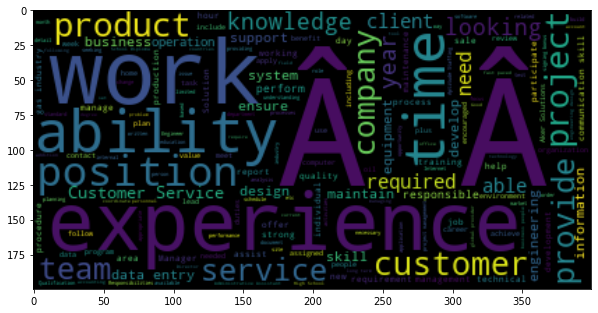

In [29]:
STOP_WORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize= (10,10))
wc = WordCloud(min_font_size=3, max_words=3000, stopwords=STOP_WORDS, random_state=10).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc, interpolation = "bilinear")

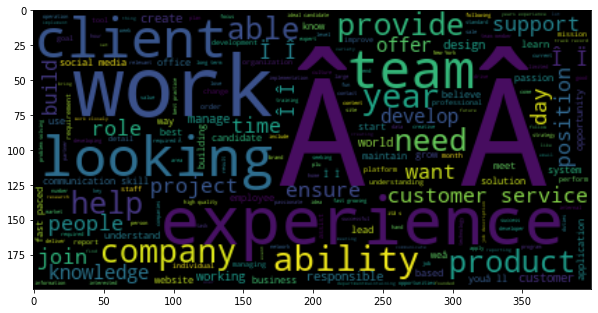

In [30]:
STOP_WORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize= (10,10))
wc = WordCloud(min_font_size=3, max_words=3000, stopwords=STOP_WORDS, random_state=10).generate(str(" ".join(realjobs_text)))
plt.imshow(wc, interpolation = "bilinear")

In [31]:
import string

In [33]:
#create a list of punctuation marks
punctuation = string.punctuation

#create a list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

#load English tokenizer, parser, tagger & word vectors
parser = English()

#create a tokeniser funtion
def spacy_tokenizer(sentence):
    #create a token object which is used to create documents with linguistic annotations
    my_tokens = parser(sentence)
    
    #lemmetizing each token & converting to lower case
    my_tokens = [word.lemma_.lower().strip()  if word.lemma_ != "-PRON" else word.lower_ for word in my_tokens]
    
    #Removing stopwords
    my_tokens = [word for word in my_tokens if word not in stop_words and word not in punctuation]
    
    #return a preprocessed list of tokens
    return my_tokens

In [34]:
#Custom transformer using spacy
class predictors(TransformerMixin):
    def transform(self, X , **trans_params):
    #cleaning text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def get_params(self, deep = True):
        return{}
    
#basic function to clean the text
def clean_text(text):
    #removing spaces and converting text into lowercase
    return text.strip().lower()

In [35]:
df3['text'] = df3['text'].apply(clean_text)

In [36]:
#import the library
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
cv = TfidfVectorizer(max_features=100)
x = cv.fit_transform(df3["text"]) #aplly it on the text
df4 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df3.drop(["text"], axis= 1, inplace=True)
df3

,fraudulent
0,0
1,0
2,0
3,0
4,0
...,...
17875,0
17876,0
17877,0
17878,0


In [38]:
main_df = pd.concat([df4,df3], axis=1)
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041173,0.000000,0.042457,0.036461,0.000000,0.754786,0.000000,0.078616,0.000000,...,0.000000,0.000000,0.185998,0.051053,0.068080,0.000000,0.00000,0.000000,0.000000,0
1,0.021940,0.070843,0.035508,0.024351,0.041824,0.029906,0.491396,0.056796,0.060119,0.035132,...,0.000000,0.078155,0.165941,0.043921,0.117139,0.101904,0.00000,0.207267,0.130634,0
2,0.000000,0.000000,0.178474,0.000000,0.042044,0.090192,0.399894,0.114190,0.000000,0.000000,...,0.000000,0.062853,0.309801,0.058870,0.000000,0.000000,0.00000,0.096166,0.075041,0
3,0.023334,0.000000,0.018882,0.000000,0.000000,0.095418,0.696813,0.000000,0.031969,0.037364,...,0.023251,0.049871,0.075635,0.046711,0.000000,0.108377,0.02037,0.050869,0.059542,0
4,0.000000,0.000000,0.068365,0.000000,0.040263,0.028790,0.608213,0.082014,0.115750,0.000000,...,0.000000,0.000000,0.159747,0.028188,0.037589,0.000000,0.00000,0.030697,0.107792,0


In [42]:
X = main_df.drop(['fraudulent'], axis=1)
y = main_df.fraudulent

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12516, 100)
(5364, 100)
(12516,)
(5364,)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
rfc = RandomForestClassifier(n_jobs=3, oob_score=True, n_estimators=100, criterion='entropy')

model= rfc.fit(X_train, y_train)

In [50]:
pred = rfc.predict(X_test)
score = accuracy_score(y_test, pred)
score

0.9705443698732289

In [51]:
print("Classification Report\n")
print(classification_report(y_test, pred))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5114
           1       0.99      0.37      0.54       250

    accuracy                           0.97      5364
   macro avg       0.98      0.69      0.76      5364
weighted avg       0.97      0.97      0.96      5364

Confusion Matrix

[[5113    1]
 [ 157   93]]
